<span style="font-size:25px; font-weight:bold">Name: Wondwosen Muhea</span><br>
<span style="font-size:20px; font-weight:bold">Course: Advanced Big Data and Data Mining (MSCS-634-M40) </span><br>
<span style="font-size:16px; font-weight:bold">Lab 2: Classification Using KNN and RNN Algorithms</span><br>

In [7]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1. Load and Split the data
#### a) Load the data

In [8]:
wine_data = load_wine()

# Features and target
x = wine_data.data
y = wine_data.target

# Feature names and target names
feature_names = wine_data.feature_names
target_names = wine_data.target_names
# Convert to a DataFrame
df = pd.DataFrame(x, columns=feature_names)
df['target'] = y
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### b) Split the data to 80% train and 20% test

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Check the shape of splits
print("The whole data size:", df.shape[0])
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

The whole data size: 178
Training set shape: (142, 13)
Test set shape: (36, 13)


### Step 2: Implement K-Nearest Neighbors (KNN) 


K=1
Accuracy: 0.7778
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.75      0.64      0.69        14
     class_2       0.64      0.70      0.67        10

    accuracy                           0.78        36
   macro avg       0.77      0.78      0.77        36
weighted avg       0.78      0.78      0.77        36



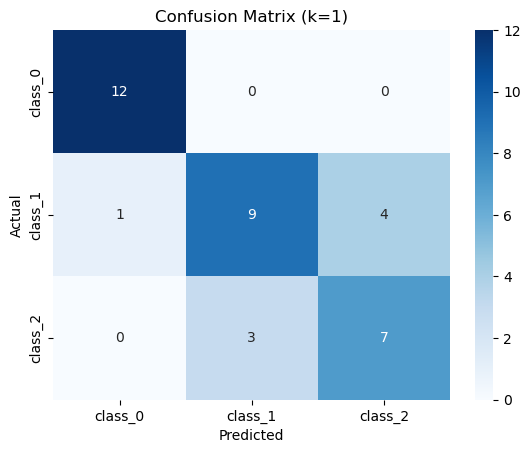


K=5
Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.77      0.71      0.74        14
     class_2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36



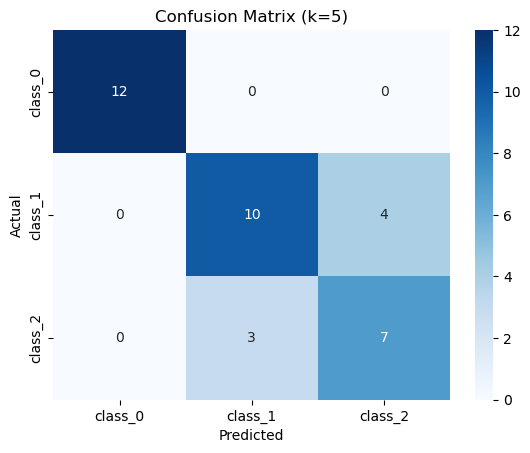


K=11
Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.57      0.73        14
     class_2       0.60      0.90      0.72        10

    accuracy                           0.81        36
   macro avg       0.84      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



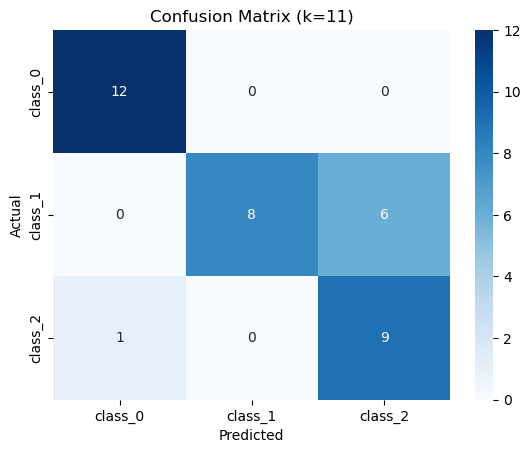


K=15
Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.57      0.73        14
     class_2       0.60      0.90      0.72        10

    accuracy                           0.81        36
   macro avg       0.84      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



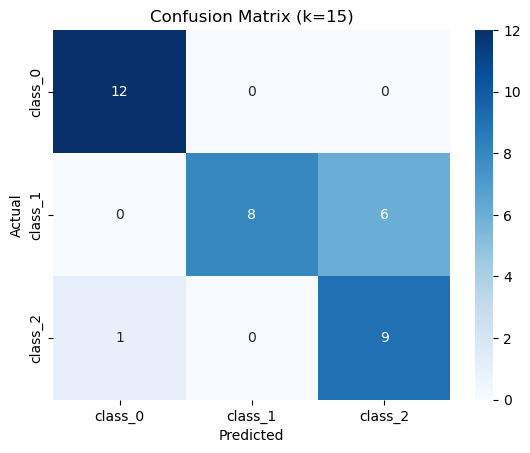


K=21
Accuracy: 0.8056
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.57      0.73        14
     class_2       0.60      0.90      0.72        10

    accuracy                           0.81        36
   macro avg       0.84      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



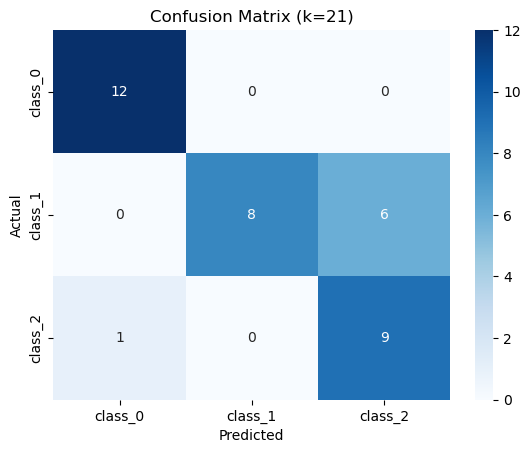

In [10]:
# Values of k to test
k_values = [1, 5, 11, 15, 21]

# To store results
results = []

for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\nK={k}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0, target_names=target_names))
    
    # Store results
    results.append((k, acc))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix (k={k})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [13]:
# Accuracy Metrics
# Convert results to data frame
accuracy_df = pd.DataFrame(results, columns=['k', 'accuracy'])
print("\nAccuracy for each k:")
display(accuracy_df)


Accuracy for each k:


,k,accuracy
0,1,0.777778
1,5,0.805556
2,11,0.805556
3,15,0.805556
4,21,0.805556


### Step 3: Implement Radius Neighbors (RNN) 


Radius=350
Accuracy: 0.7222 (36 valid predictions)
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.58      1.00      0.74        14
     class_2       1.00      0.10      0.18        10

    accuracy                           0.72        36
   macro avg       0.86      0.67      0.63        36
weighted avg       0.84      0.72      0.66        36



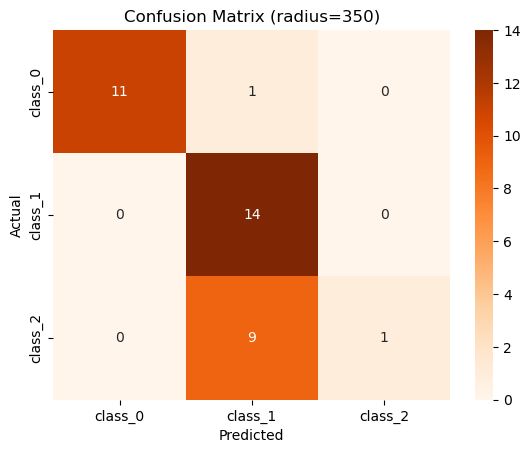


Radius=400
Accuracy: 0.6944 (36 valid predictions)
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.56      1.00      0.72        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.52      0.64      0.56        36
weighted avg       0.55      0.69      0.60        36



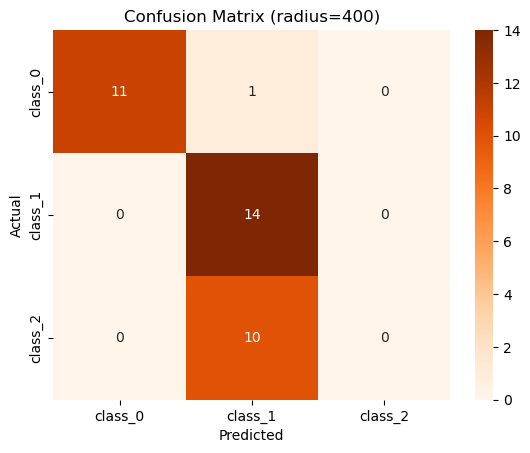


Radius=450
Accuracy: 0.6944 (36 valid predictions)
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.56      1.00      0.72        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.52      0.64      0.56        36
weighted avg       0.55      0.69      0.60        36



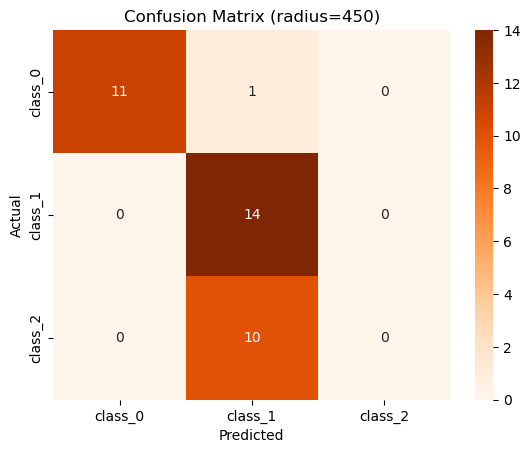


Radius=500
Accuracy: 0.6944 (36 valid predictions)
              precision    recall  f1-score   support

     class_0       1.00      0.92      0.96        12
     class_1       0.56      1.00      0.72        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.69        36
   macro avg       0.52      0.64      0.56        36
weighted avg       0.55      0.69      0.60        36



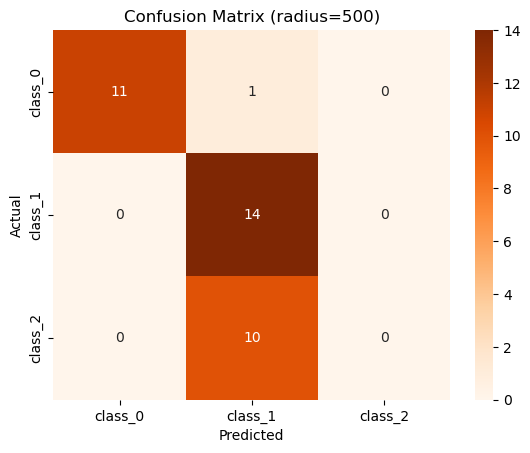


Radius=550
Accuracy: 0.6667 (36 valid predictions)
              precision    recall  f1-score   support

     class_0       1.00      0.83      0.91        12
     class_1       0.54      1.00      0.70        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.67        36
   macro avg       0.51      0.61      0.54        36
weighted avg       0.54      0.67      0.58        36



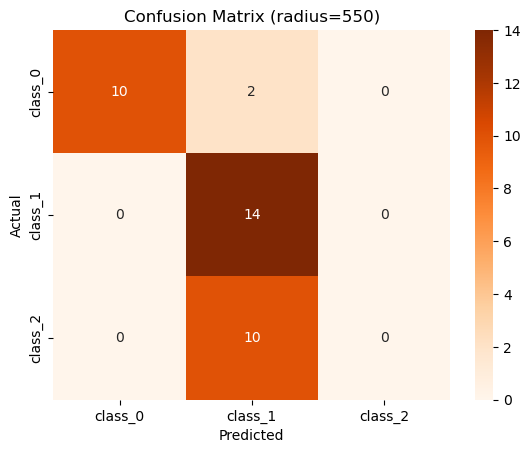


Radius=600
Accuracy: 0.6667 (36 valid predictions)
              precision    recall  f1-score   support

     class_0       1.00      0.83      0.91        12
     class_1       0.54      1.00      0.70        14
     class_2       0.00      0.00      0.00        10

    accuracy                           0.67        36
   macro avg       0.51      0.61      0.54        36
weighted avg       0.54      0.67      0.58        36



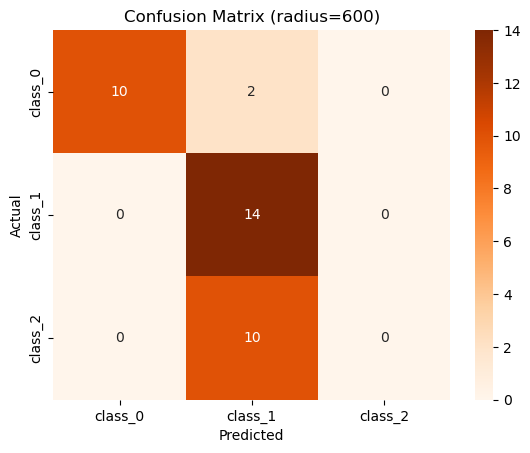

In [15]:
# List of radius values to evaluate
radius_values = [350, 400, 450, 500, 550, 600]

# Store accuracy results
rnn_results = []

for r in radius_values:
    # Create Radius Neighbors Classifier
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=-1)
    rnn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = rnn.predict(X_test)

    # Remove outliers (-1 predictions) before scoring
    valid_idx = y_pred != -1
    filtered_y_pred = y_pred[valid_idx]
    filtered_y_true = y_test[valid_idx]

    if len(filtered_y_true) > 0:
        acc = accuracy_score(filtered_y_true, filtered_y_pred)
    else:
        acc = np.nan  # No valid predictions at this radius

    print(f"\nRadius={r}")
    print(f"Accuracy: {acc:.4f} ({len(filtered_y_true)} valid predictions)")
    if len(filtered_y_true) > 0:
        print(classification_report(filtered_y_true, filtered_y_pred, zero_division=0, target_names=target_names))

        # Confusion Matrix
        cm = confusion_matrix(filtered_y_true, filtered_y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
        plt.title(f"Confusion Matrix (radius={r})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    rnn_results.append((r, acc))

In [16]:
# Accuracy Metrics
# Convert to DataFrame for clean display
rnn_accuracy_df = pd.DataFrame(rnn_results, columns=["radius", "accuracy"])
print("\nAccuracy per radius:")
display(rnn_accuracy_df)


Accuracy per radius:


,radius,accuracy
0,350,0.722222
1,400,0.694444
2,450,0.694444
3,500,0.694444
4,550,0.666667
5,600,0.666667


### Step 4: Visualize and Compare Results 

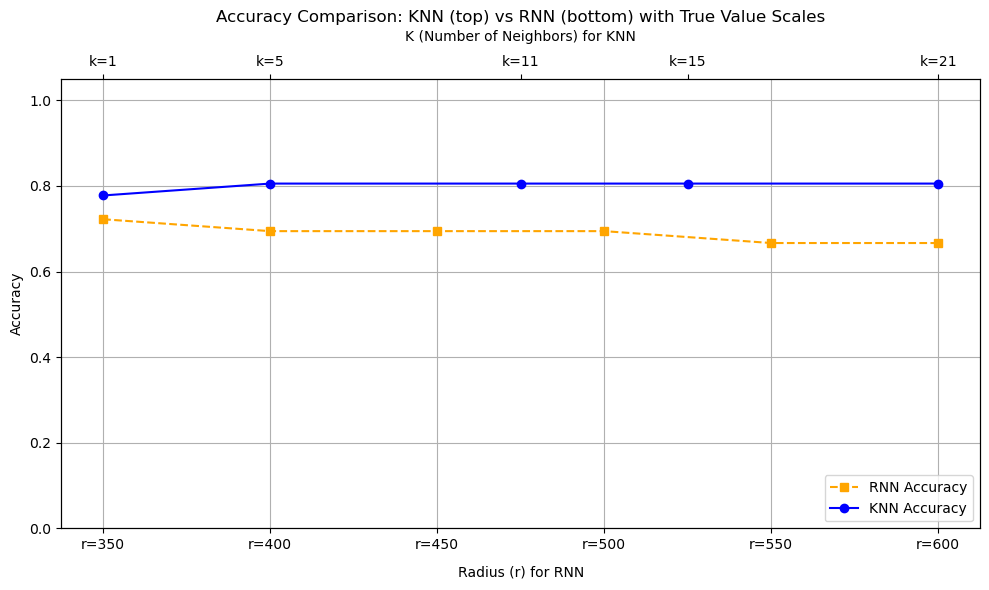

In [44]:
# Use actual k and radius values (not matched or scaled)

knn_accuracies = [acc for _, acc in results]
rnn_accuracies = [acc for _, acc in rnn_results]

# Create base plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RNN on bottom x-axis
ax1.plot(r_values, rnn_accuracies, marker='s', linestyle='--', color='orange', label='RNN Accuracy')
ax1.set_xlabel("Radius (r) for RNN", labelpad=10)
ax1.set_ylabel("Accuracy")
ax1.set_ylim(0, 1.05)
ax1.grid(True)
ax1.set_xticks(r_values)
ax1.set_xticklabels([f"r={r}" for r in r_values])

# Top x-axis for KNN
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Align the scales visually
ax2.set_xticks(ax1.get_xticks())  # Align ticks to match up
# Map K values proportionally to match visual spacing (interpolated manually)
k_positions = np.interp(k_values, [min(k_values), max(k_values)], [min(r_values), max(r_values)])
ax2.set_xticks(k_positions)
ax2.set_xticklabels([f"k={k}" for k in k_values])
ax2.set_xlabel("K (Number of Neighbors) for KNN", labelpad=10)

# Overlay KNN accuracy points on the top axis (blue markers only for reference)
ax1.plot(k_positions, knn_accuracies, marker='o', color='blue', label='KNN Accuracy')

# Add legend
ax1.legend(loc='lower right')

# Title and layout
plt.title("Accuracy Comparison: KNN (top) vs RNN (bottom) with True Value Scales")
plt.tight_layout()
plt.show()

### Final Discussion

<div style="text-align: justify">

#### Performance Comparison

**KNN**
- Achieved moderate accuracy around **77%**
- Accuracy shows a slight increase for k values greater than 1
- Larger K values show better classification stability

**RNN**
- Sensitve to radius values rusulting on accuracy variability
- Predicted close to KNN at the radius value = 350
- Shows less reliablity in the given data set

In general, KNN outperforms RNN

#### Discussion of KNN or RNN preference
**KNN** is preferred in cases when 
- a stable performance is needed
- there is clean class separation in the dataset
- all inputs are going to be classified

**RNN** is preferred when
- non-uniform desity exists in the dataset
- more outliners exist in dataset
</div>